In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Sample dataset
np.random.seed(42)
students = 50
data = {
    'Student_ID': range(1, students + 1),
    'Math_Score': np.random.normal(70, 15, students).astype(int),
    'Science_Score': np.random.normal(75, 10, students).astype(int),
    'English_Score': np.random.normal(65, 12, students).astype(int),
    'Attendance': np.random.uniform(70, 100, students).astype(int)
}
df = pd.DataFrame(data)

In [3]:
df.head(10)

,Student_ID,Math_Score,Science_Score,English_Score,Attendance
0,1,77,78,48,96
1,2,67,71,59,93
2,3,79,68,60,89
3,4,92,81,55,72
4,5,66,85,63,74
5,6,66,84,69,96
6,7,93,66,87,88
7,8,81,71,67,70
8,9,62,78,68,73
9,10,78,84,64,89


Intentionally putting inconsistancies

In [4]:
df.loc[5, 'Math_Score'] = np.nan  # Missing value
df.loc[20, 'Science_Score'] = np.nan  # Missing value
df.loc[10, 'English_Score'] = 200  # Outlier
df.loc[30, 'Attendance'] = 30  # Outlier

In [5]:
df.head(10)

,Student_ID,Math_Score,Science_Score,English_Score,Attendance
0,1,77.0,78.0,48,96
1,2,67.0,71.0,59,93
2,3,79.0,68.0,60,89
3,4,92.0,81.0,55,72
4,5,66.0,85.0,63,74
5,6,NaN,84.0,69,96
6,7,93.0,66.0,87,88
7,8,81.0,71.0,67,70
8,9,62.0,78.0,68,73
9,10,78.0,84.0,64,89


In [6]:
# Handle missing values using median
df.fillna(df.median(), inplace=True)

In [12]:
# Handle outliers using Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(df[['Math_Score', 'Science_Score', 'English_Score', 'Attendance']]))
df = df[(z_scores < 3).all(axis=1)]

In [8]:
# Apply transformation 
df['Log_Attendance'] = np.log(df['Attendance'])

In [9]:
df.head()

,Student_ID,Math_Score,Science_Score,English_Score,Attendance,Log_Attendance
0,1,77.0,78.0,48,96,4.564348
1,2,67.0,71.0,59,93,4.532599
2,3,79.0,68.0,60,89,4.488636
3,4,92.0,81.0,55,72,4.276666
4,5,66.0,85.0,63,74,4.304065


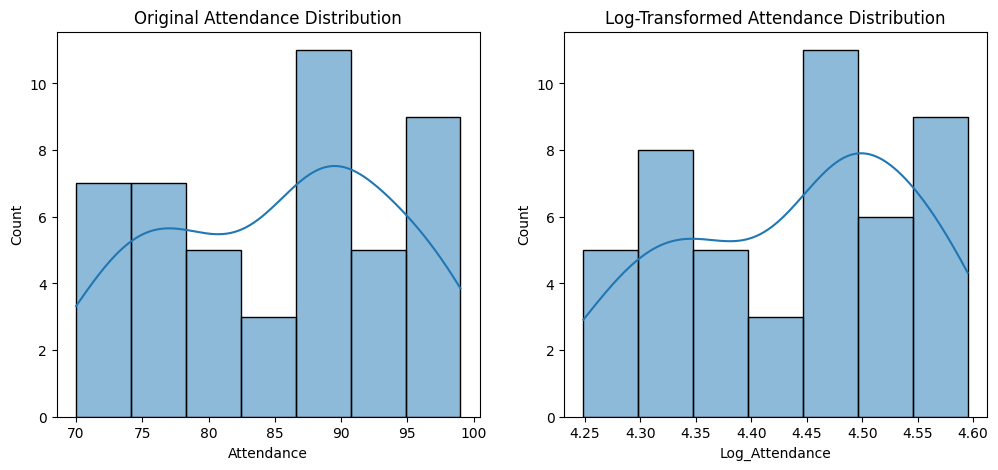

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Attendance'], kde=True, ax=ax[0])
ax[0].set_title('Original Attendance Distribution')
sns.histplot(df['Log_Attendance'], kde=True, ax=ax[1])
ax[1].set_title('Log-Transformed Attendance Distribution')
plt.show()